In [2]:
run run_figures.py

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from gutenberg.utils import Library

In [2]:
data_file = 'gutenberg/books.bin'
auxdata_file = 'gutenberg/books_metadata.json'

data = np.memmap(data_file, dtype=np.uint16, mode='r')
auxdata = []
with open(auxdata_file, 'r') as file:
    for line in file:
        auxdata.append(json.loads(line))

In [ ]:
library = Library(data, auxdata)

In [ ]:
num_blocks_per_book = []
for book in library:
    train_data = book['train_data']
    num_blocks_per_book.append(len(train_data))

In [18]:
batch_size = 8
num_batches_per_book = num_blocks_per_book // batch_size + 1

In [9]:
with open('results.json', 'r') as json_file:
    results = json.load(json_file)

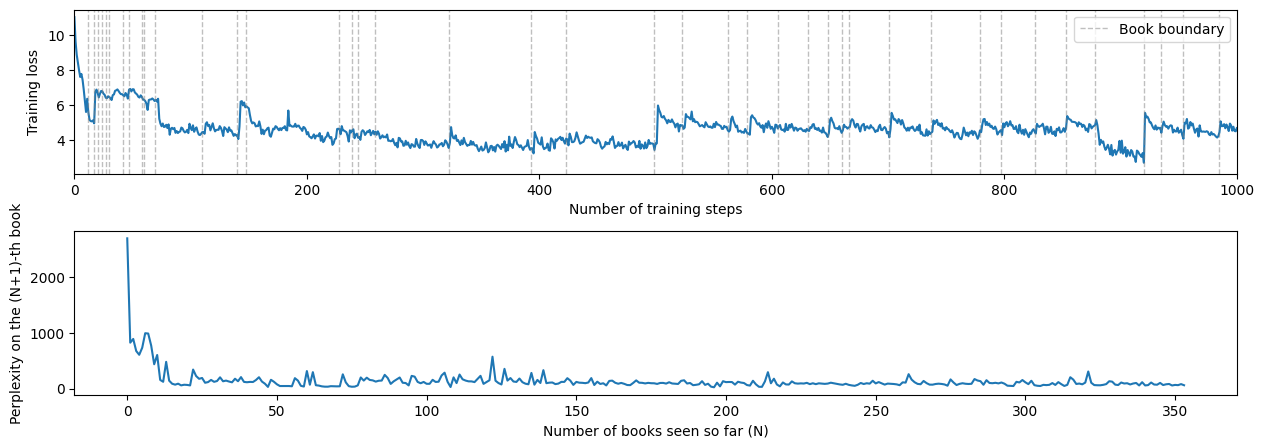

In [32]:
from matplotlib.lines import Line2D

fig, axes = plt.subplots(2, 1, figsize=(15, 5))
ax = axes[0]
ax.plot(results['tr_loss'])

for x in np.cumsum(num_batches_per_book):
    ax.axvline(x=x, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax.set_xlim([0, 1000])

ax.set_xlabel("Number of training steps")
ax.set_ylabel("Training loss")

custom_legend = [Line2D([0], [0], color='gray', linestyle='--', linewidth=1, alpha=0.5, label='Book boundary')]
ax.legend(handles=custom_legend, loc='upper right')

ax = axes[1]
ax.plot(results['perplexity'])

ax.set_xlabel("Number of books seen so far (N)")
ax.set_ylabel("Perplexity on the (N+1)-th book")

plt.subplots_adjust(hspace=0.35)

plt.show()

In [2]:
with open('sc_results.json', 'r') as json_file:
    results = json.load(json_file)

with open('sc_pt_results.json', 'r') as json_file:
    pt_results = json.load(json_file)

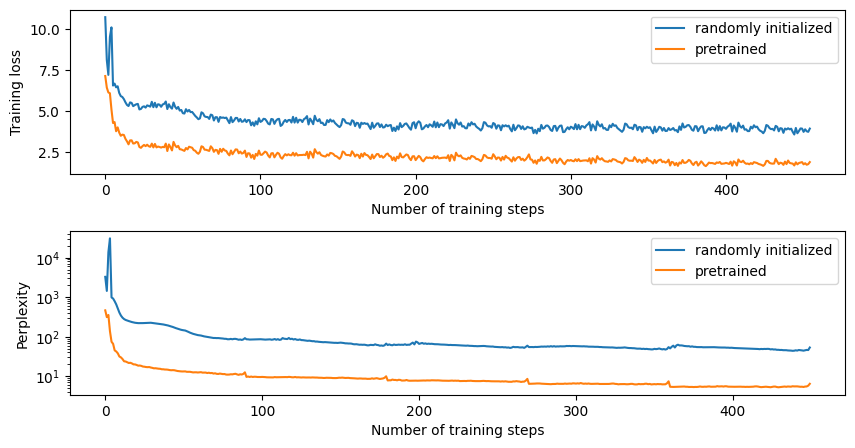

In [7]:
from matplotlib.lines import Line2D

fig, axes = plt.subplots(2, 1, figsize=(10, 5))

ax = axes[0]

ax.plot(results['tr_loss'], label='randomly initialized')
ax.plot(pt_results['tr_loss'], label='pretrained')

ax.set_xlabel("Number of training steps")
ax.set_ylabel("Training loss")

ax.legend()

ax = axes[1]

ax.plot(results['perplexity'], label='randomly initialized')
ax.plot(pt_results['perplexity'], label='pretrained')

ax.set_yscale('log')

ax.set_xlabel("Number of training steps")
ax.set_ylabel("Perplexity")

ax.legend()

plt.subplots_adjust(hspace=0.35)

plt.show()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


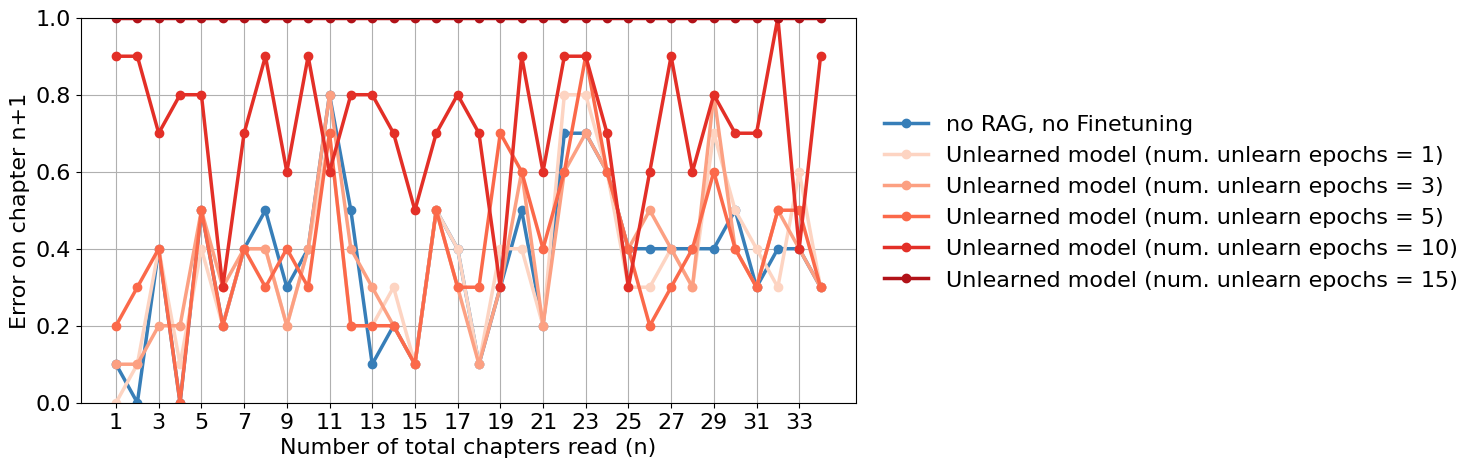

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fontsize = 16
lw = 2.5

# set the number of chapters
T = 35

t, k, truths, preds = get_results('hp1_2_instant/vanilla')
color = '#377eb8'
perr, perr_lower, perr_upper = get_errors(t, truths, preds, T)
ax.plot(range(1, T), perr, color=color, label='no RAG, no Finetuning', marker='o', lw=lw)

ckpt_ids = [1, 3, 5, 10, 15]
reds = sns.color_palette("Reds", len(ckpt_ids))
for i, id in enumerate(ckpt_ids):
    t, k, truths, preds = get_results(f'vanilla_{id}')
    perr, perr_lower, perr_upper = get_errors(t, truths, preds, T)
    ax.plot(range(1, T), perr, color=reds[i], label=f'Unlearned model (num. unlearn epochs = {id})', marker='o', lw=lw)

ax.tick_params(axis='both', labelsize=16)

ax.set_xticks(range(1, T, 2))
ax.set_ylabel("Error on chapter n+1", fontsize=fontsize)
ax.set_xlabel("Number of total chapters read (n)", fontsize=fontsize)
ax.set_ylim([0, 1])
ax.legend(fontsize=fontsize, loc='upper left', bbox_to_anchor=(1.01, 0.8), frameon=False)
ax.grid()
plt.show()

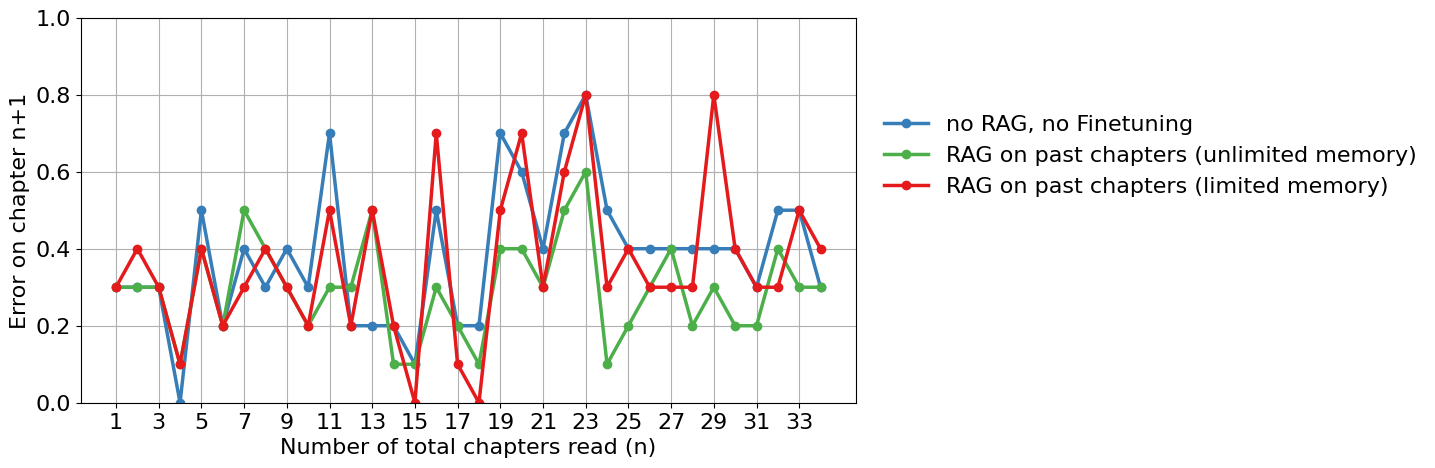

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fontsize = 16
lw = 2.5

# set the number of chapters
T = 35

t, k, truths, preds = get_results('vanilla_u5')
color = '#377eb8'
perr, perr_lower, perr_upper = get_errors(t, truths, preds, T)
ax.plot(range(1, T), perr, color=color, label='no RAG, no Finetuning', marker='o', lw=lw)

t, k, truths, preds = get_results('rag_unlimited_u5')
color = '#4daf4a'
perr, perr_lower, perr_upper = get_errors(t, truths, preds, T)
ax.plot(range(1, T), perr, color=color, label='RAG on past chapters (unlimited memory)', marker='o', lw=lw)
# ax.fill_between(range(1, T), perr_lower, perr_upper, alpha=0.3, color=color)

t, k, truths, preds = get_results('rag_limited_5_u5')
color = '#e41a1c'
perr, perr_lower, perr_upper = get_errors(t, truths, preds, T)
ax.plot(range(1, T), perr, color=color, label='RAG on past chapters (limited memory)', marker='o', lw=lw)


ax.tick_params(axis='both', labelsize=16)

ax.set_xticks(range(1, T, 2))
ax.set_ylabel("Error on chapter n+1", fontsize=fontsize)
ax.set_xlabel("Number of total chapters read (n)", fontsize=fontsize)
ax.set_ylim([0, 1])
ax.legend(fontsize=fontsize, loc='upper left', bbox_to_anchor=(1.01, 0.8), frameon=False)
ax.grid()
plt.show()

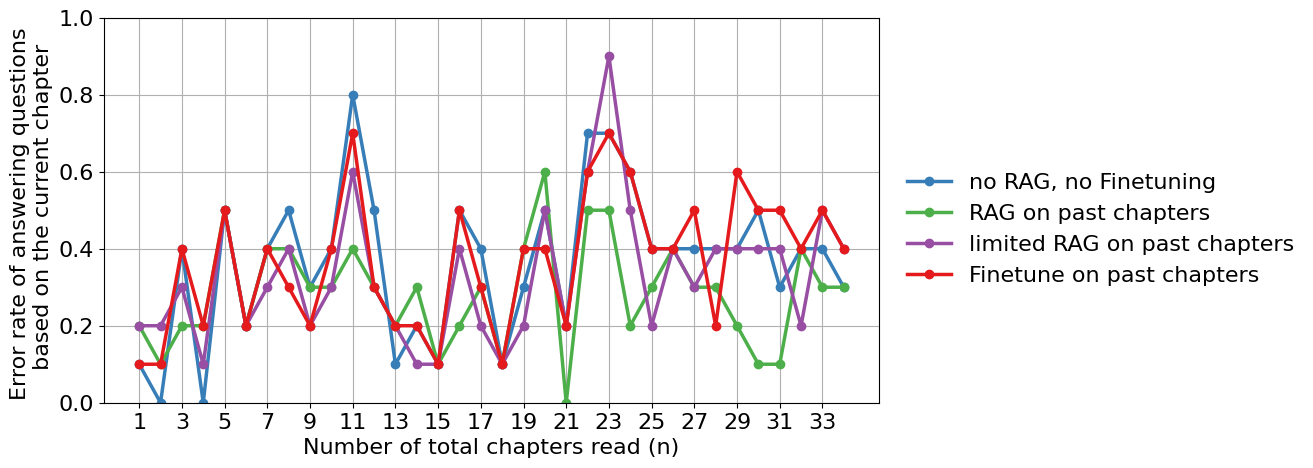

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fontsize = 16
lw = 2.5

# set the number of chapters
T = 35

t, k, truths, preds = get_results('vanilla')
color = '#377eb8'
perr, perr_lower, perr_upper = get_errors(t, truths, preds, T)
ax.plot(range(1, T), perr, color=color, label='no RAG, no Finetuning', marker='o', lw=lw)
# ax.fill_between(range(1, T), perr_lower, perr_upper, alpha=0.3, color=color)

t, k, truths, preds = get_results('rag_unlimited')
color = '#4daf4a'
perr, perr_lower, perr_upper = get_errors(t, truths, preds, T)
ax.plot(range(1, T), perr, color=color, label='RAG on past chapters', marker='o', lw=lw)
# ax.fill_between(range(1, T), perr_lower, perr_upper, alpha=0.3, color=color)

t, k, truths, preds = get_results('rag_limited_5')
color = '#984ea3'
perr, perr_lower, perr_upper = get_errors(t, truths, preds, T)
ax.plot(range(1, T), perr, color=color, label='limited RAG on past chapters', marker='o', lw=lw)
# ax.fill_between(range(1, T), perr_lower, perr_upper, alpha=0.3, color=color)

t, k, truths, preds = get_results('ft_1')
color = '#e41a1c'
perr, perr_lower, perr_upper = get_errors(t, truths, preds, T)
ax.plot(range(1, T), perr, color=color, label='Finetune on past chapters', marker='o', lw=lw)
# ax.fill_between(range(1, T), perr_lower, perr_upper, alpha=0.3, color=color)

# reds = sns.color_palette("Reds", 5)
# for i, exp in enumerate(['ft_1', 'ft_2', 'ft_3', 'ft_4', 'ft_5']):
#     t, k, truths, preds = get_results(exp)
#     perr, perr_lower, perr_upper = get_errors(t, truths, preds, T)
#     num_epochs = exp.split('_')[1]
#     ax.plot(range(1, T), perr, color=reds[i], label=f'Finetune on past chapters (num. epochs = {num_epochs})', marker='o', lw=lw)
#     # ax.fill_between(range(1, T), perr_lower, perr_upper, alpha=0.3, color=color)

ax.tick_params(axis='both', labelsize=16)

ax.set_xticks(range(1, T, 2))
ax.set_ylabel("Error rate of answering questions \n based on the current chapter", fontsize=fontsize)
ax.set_xlabel("Number of total chapters read (n)", fontsize=fontsize)
ax.set_ylim([0, 1])
ax.legend(fontsize=fontsize, loc='upper left', bbox_to_anchor=(1.01, 0.65), frameon=False)
ax.grid()
plt.show()

### NEW STUFF

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def compute_errors(file):
    df = pd.read_json(file)
    truths = []
    preds = []
    errors = []
    for i, row in df.iterrows():
        truths_ = np.array(row['truths'])
        preds_ = np.array(row['preds'])
        err = np.mean(truths_ != preds_)
        errors.append(err)
    return np.array(errors)

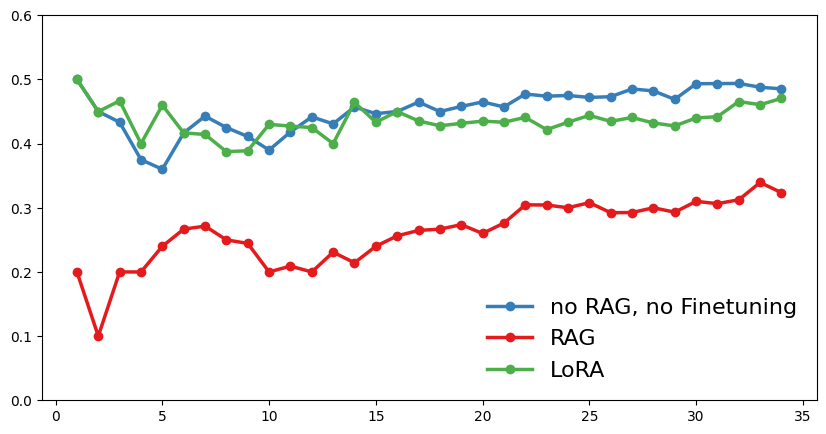

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fontsize = 16
lw = 2.5

color = '#377eb8'
errors = compute_errors("results/chapterwise/vanilla.json")
ax.plot(range(1, len(errors)+1), errors, color=color, label='no RAG, no Finetuning', marker='o', lw=lw)

color = '#e41a1c'
errors = compute_errors("results/chapterwise/rag.json")
ax.plot(range(1, len(errors)+1), errors, color=color, label='RAG', marker='o', lw=lw)

color = '#4daf4a'
errors = compute_errors("results/chapterwise/lora.json")
ax.plot(range(1, len(errors)+1), errors, color=color, label='LoRA', marker='o', lw=lw)

ax.set_ylim([0, 0.6])
ax.legend(fontsize=fontsize, frameon=False)
plt.show()

In [20]:
def compute_chapterwise_errors(file):
    df = pd.read_json(file)
    means = []
    stds = []
    for i, row in df.iterrows():
        truths_ = np.array(row['truths'])
        preds_ = np.array(row['preds'])

        scores = (truths_ != preds_).astype(int)
        scores_mean = scores.mean(axis=1)
        scores_std = scores.std(axis=1)

        errors_mean = np.array([scores_mean[i:i+10] for i in range(0, len(scores_mean), 10)]).mean(axis=1)
        errors_std = np.array([scores_std[i:i+10] for i in range(0, len(scores_std), 10)])
        errors_std = np.sqrt((errors_std**2).sum(axis=1))/10

        tmp = -1 * np.ones(len(df))
        tmp[:len(errors_mean)] = errors_mean
        means.append(tmp)

        tmp = -1 * np.ones(len(df))
        tmp[:len(errors_std)] = errors_std
        stds.append(tmp)
    return np.array(means), np.array(stds)

In [4]:
file = "results/hp1_3_chapterwise/vanilla_seeds.json"
chapterwise_errors = compute_chapterwise_errors(file)

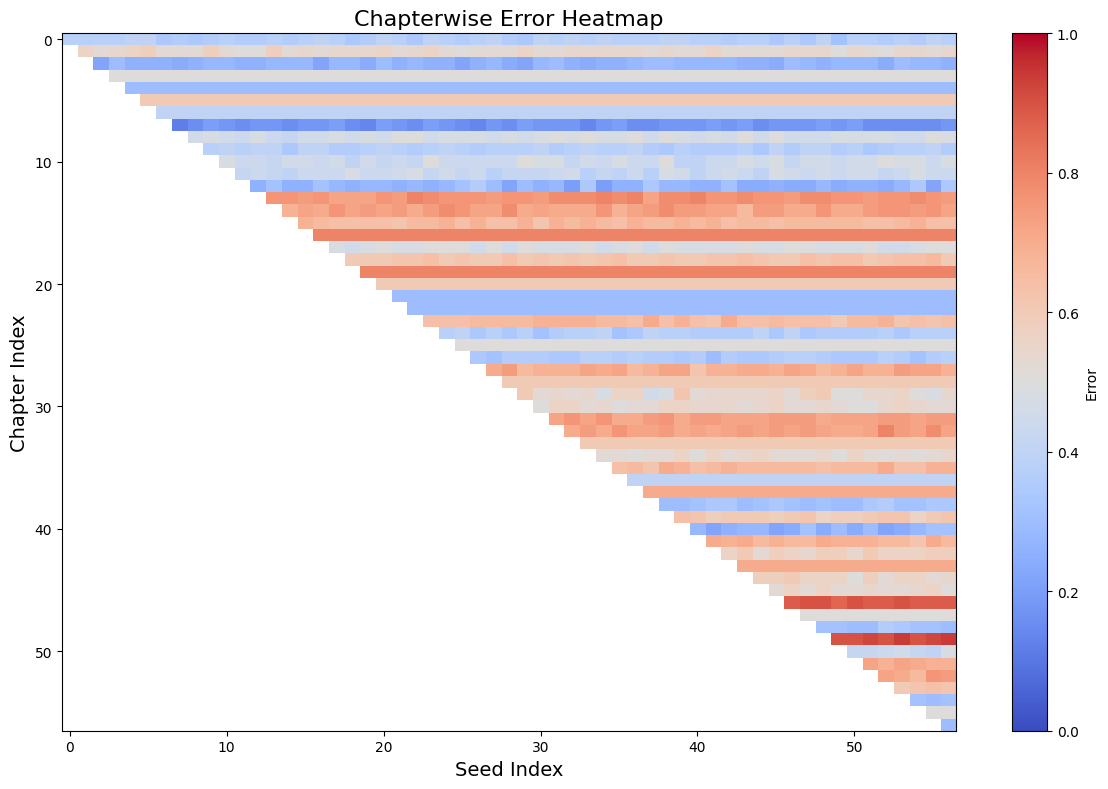

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
masked_errors = np.ma.masked_where(chapterwise_errors.T == -1, chapterwise_errors.T)
im = ax.imshow(masked_errors, aspect='auto', cmap='coolwarm', vmin=0, vmax=1)
im.cmap.set_bad(color='white')

ax.set_xlabel("Seed Index", fontsize=14)
ax.set_ylabel("Chapter Index", fontsize=14)
ax.set_title("Chapterwise Error Heatmap", fontsize=16)
fig.colorbar(im, ax=ax, label='Error')
plt.tight_layout()
plt.show()

In [6]:
file = "results/hp1_3_chapterwise/rag_seeds.json"
chapterwise_errors = compute_chapterwise_errors(file)

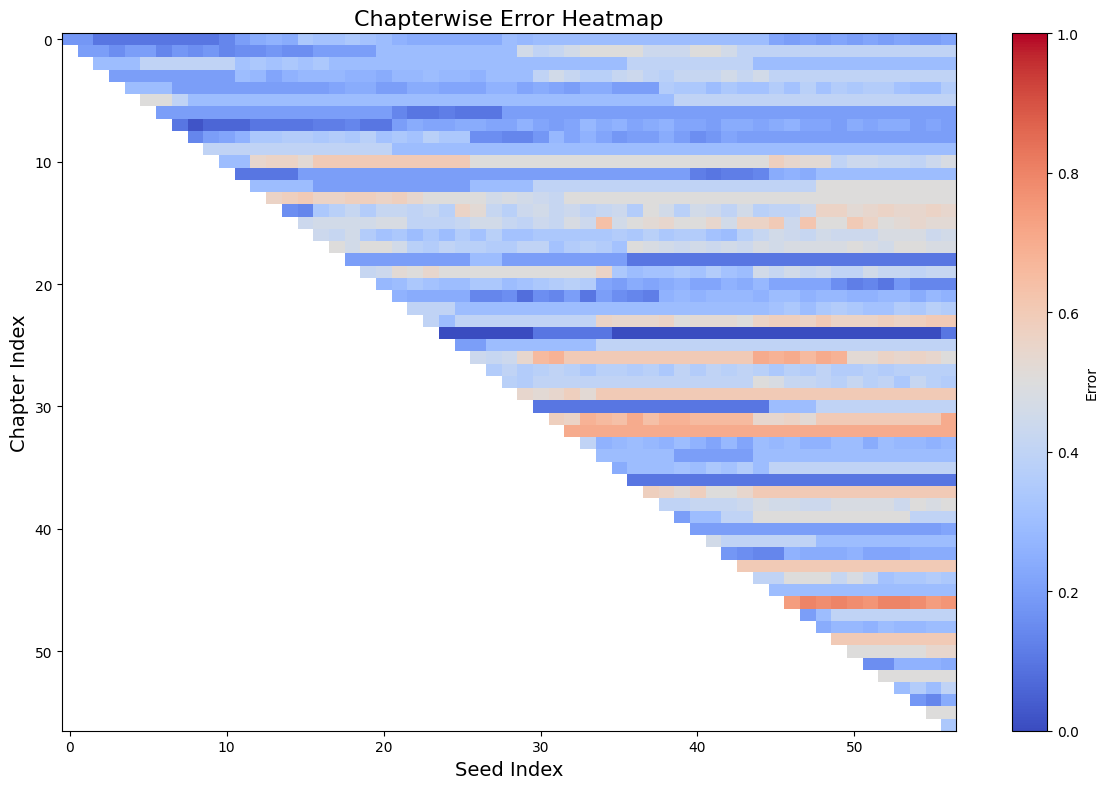

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
masked_errors = np.ma.masked_where(chapterwise_errors.T == -1, chapterwise_errors.T)
im = ax.imshow(masked_errors, aspect='auto', cmap='coolwarm', vmin=0, vmax=1)
im.cmap.set_bad(color='white')

ax.set_xlabel("Seed Index", fontsize=14)
ax.set_ylabel("Chapter Index", fontsize=14)
ax.set_title("Chapterwise Error Heatmap", fontsize=16)
fig.colorbar(im, ax=ax, label='Error')
plt.tight_layout()
plt.show()

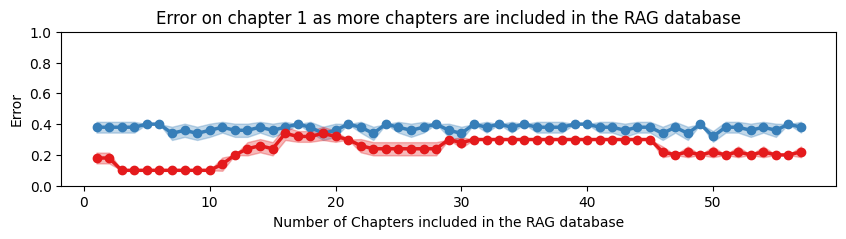

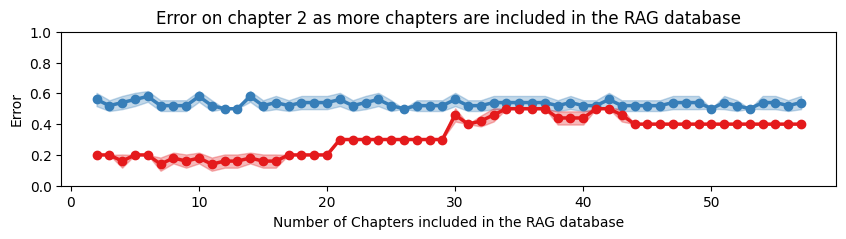

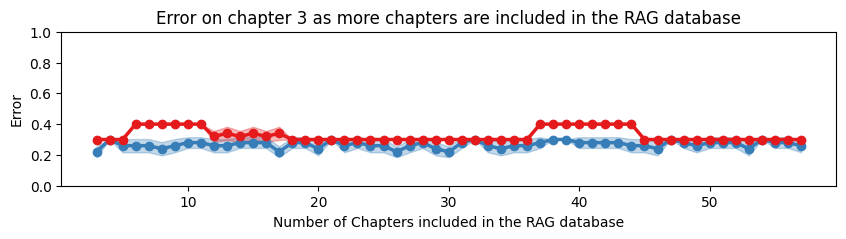

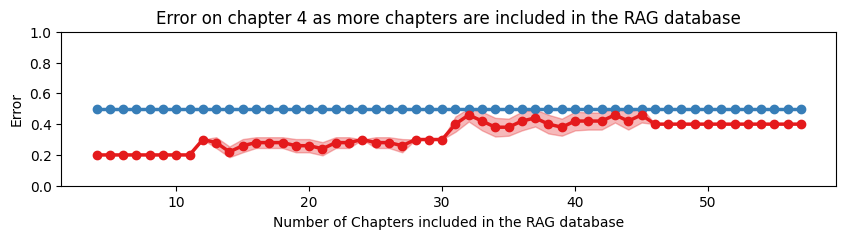

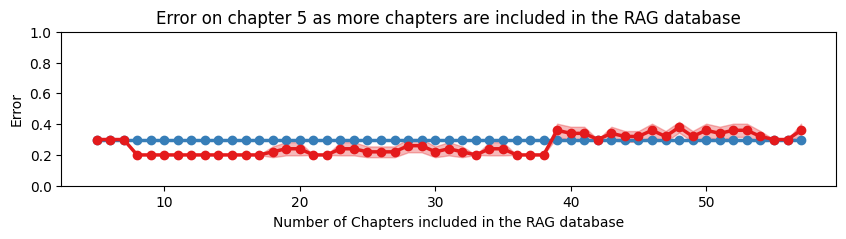

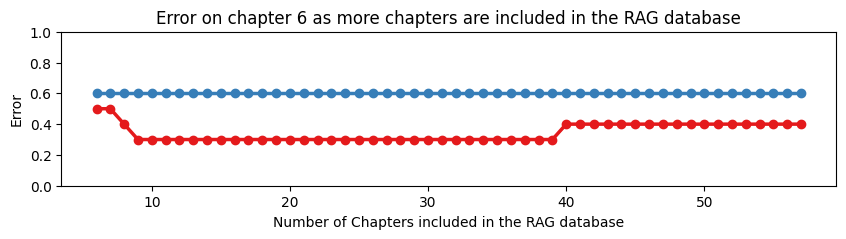

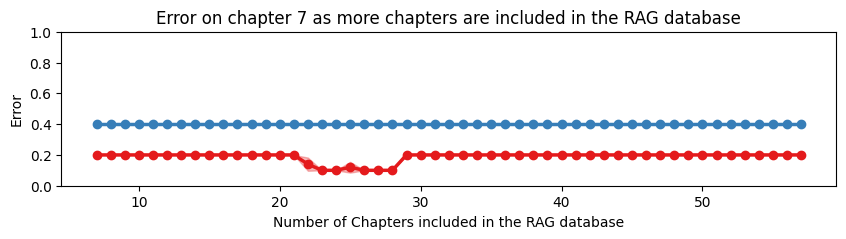

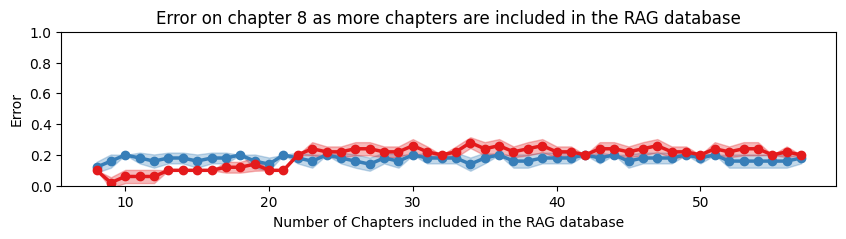

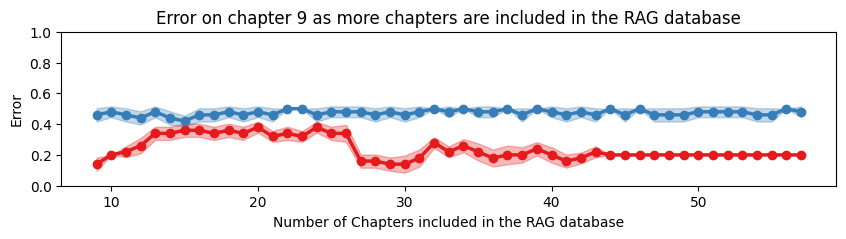

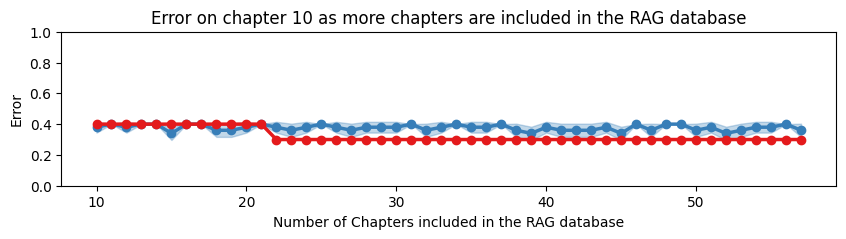

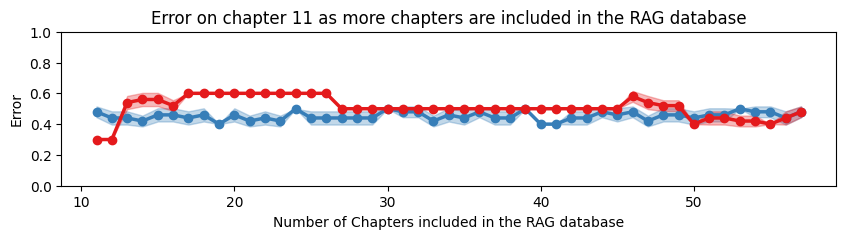

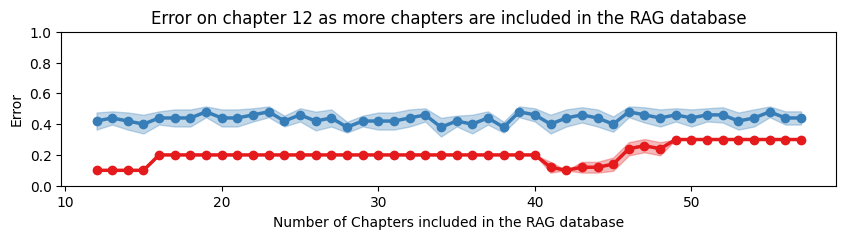

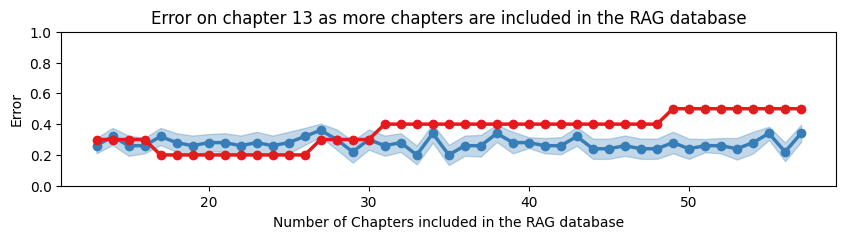

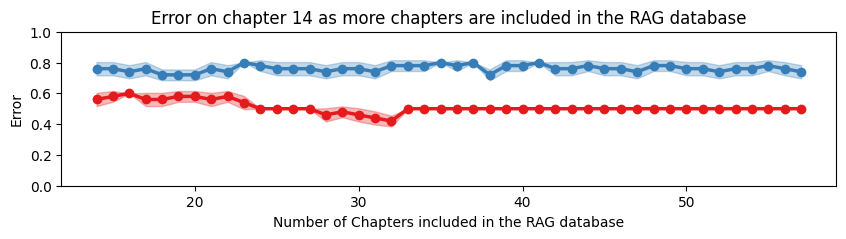

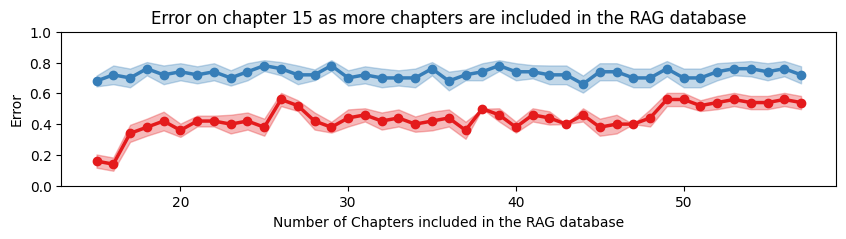

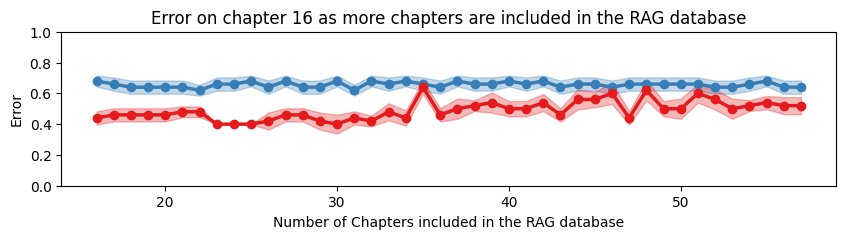

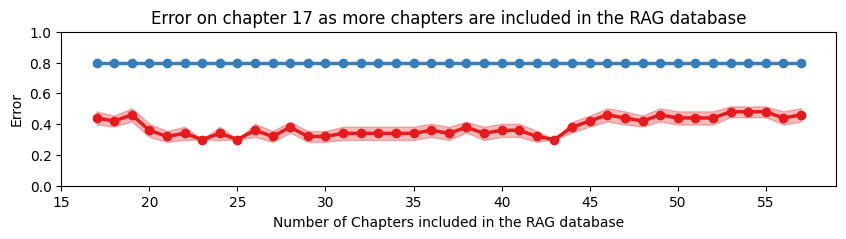

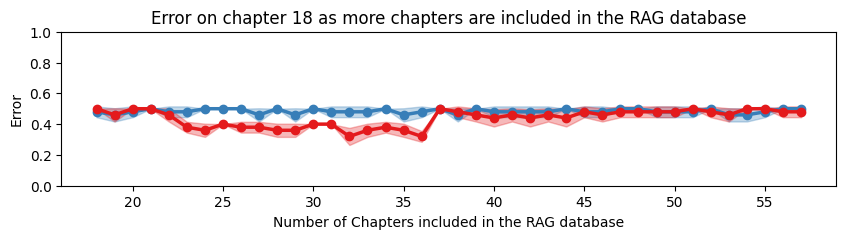

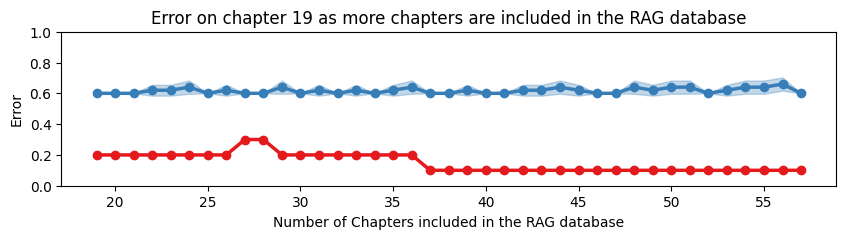

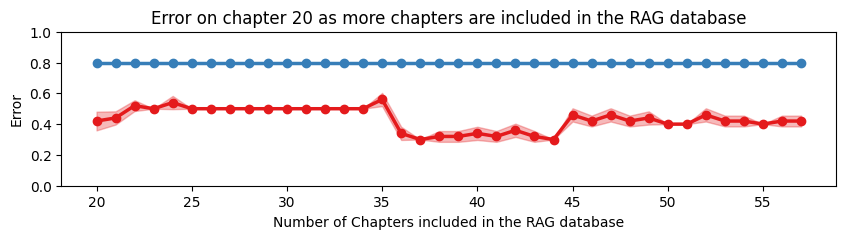

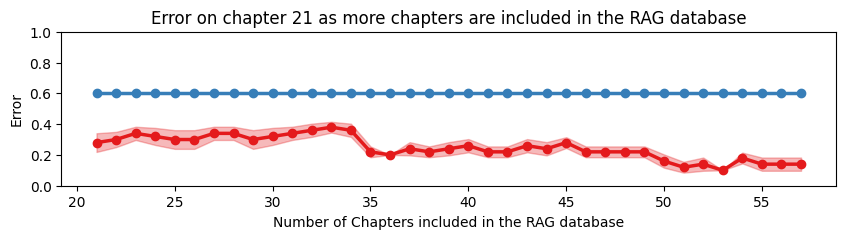

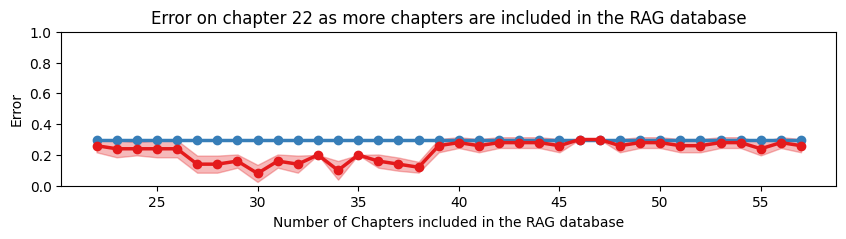

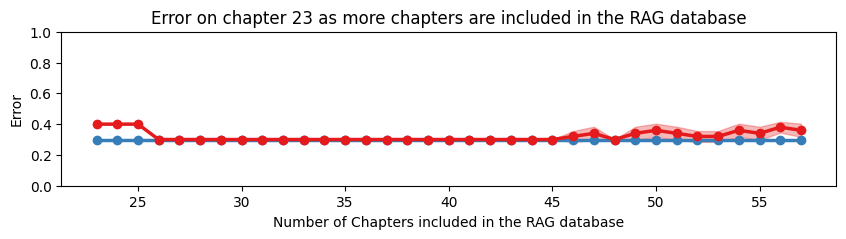

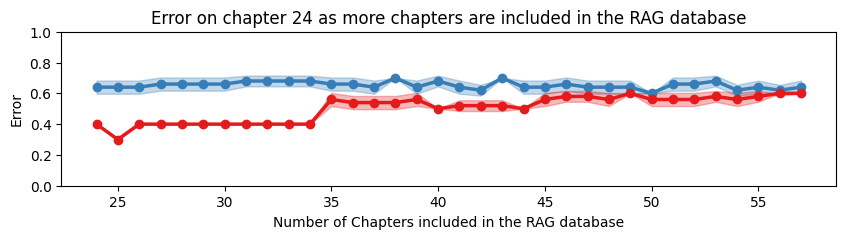

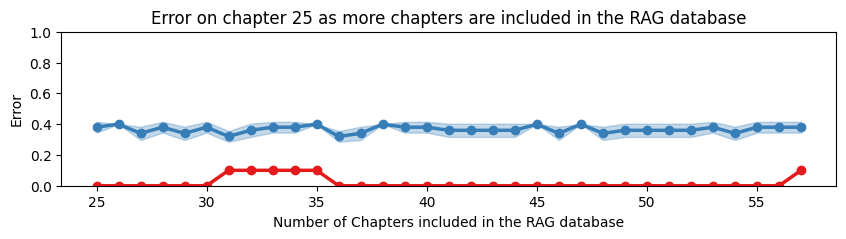

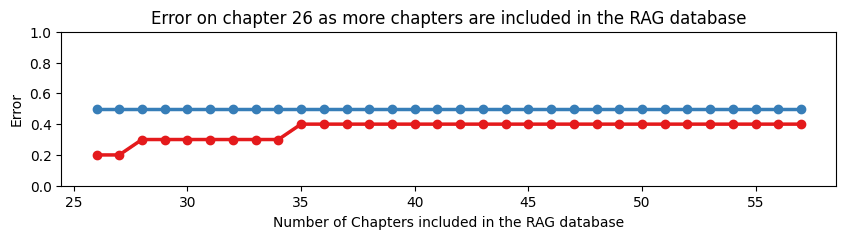

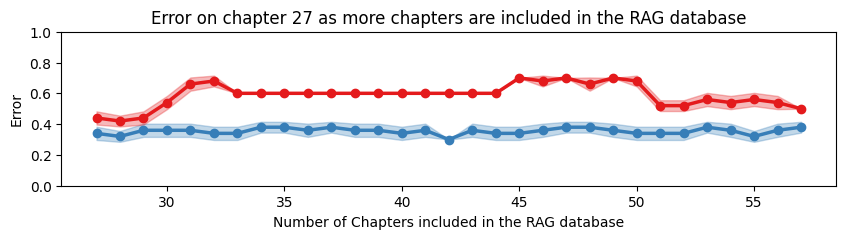

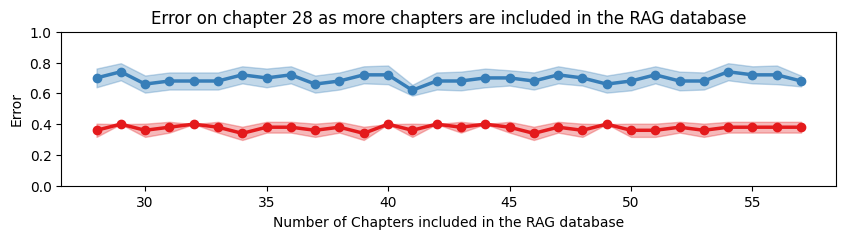

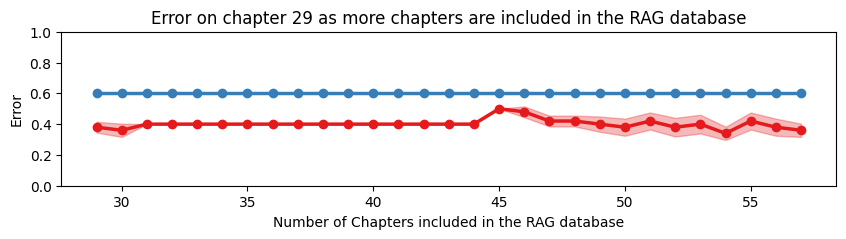

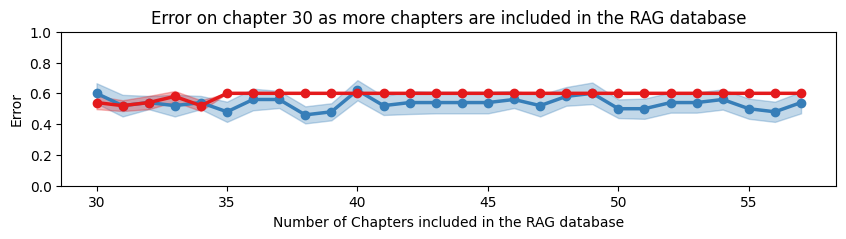

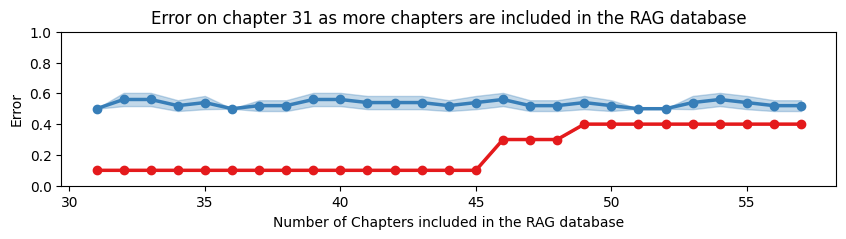

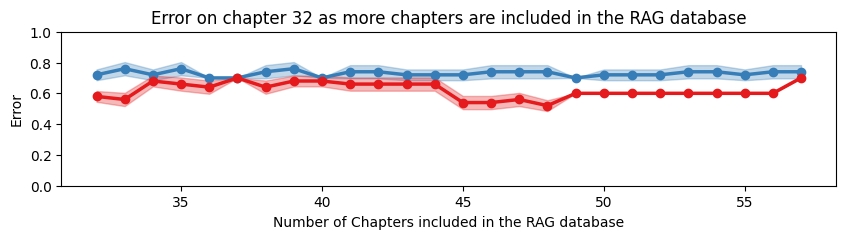

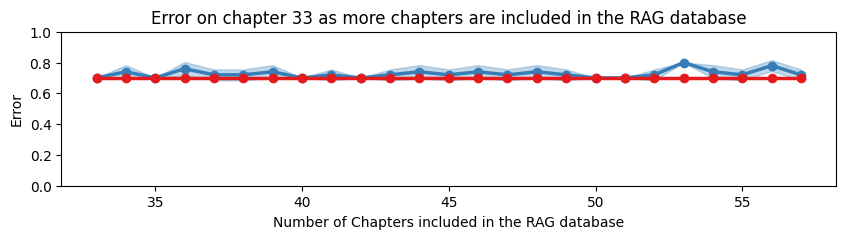

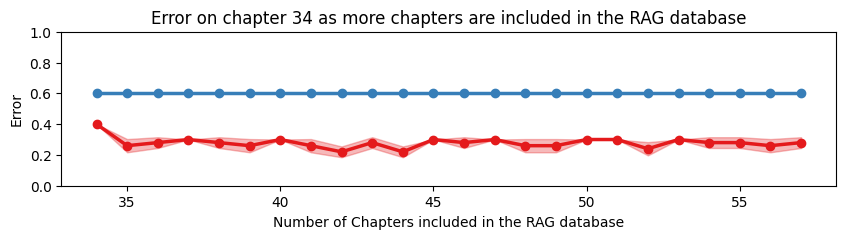

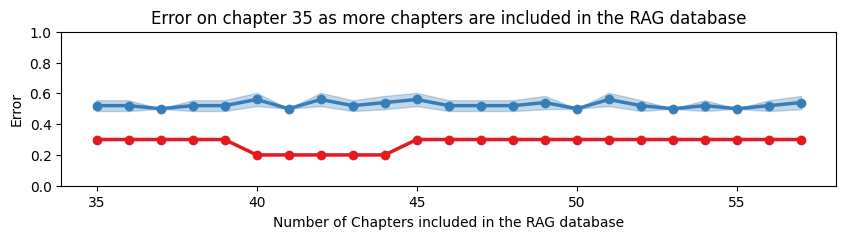

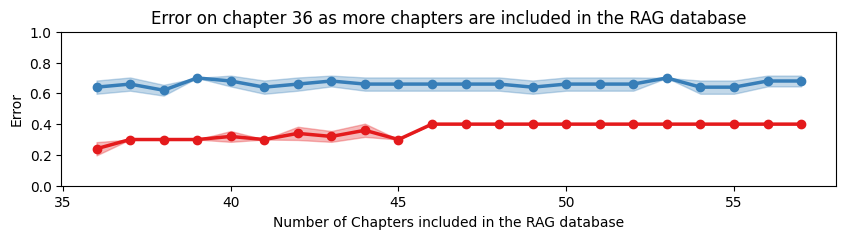

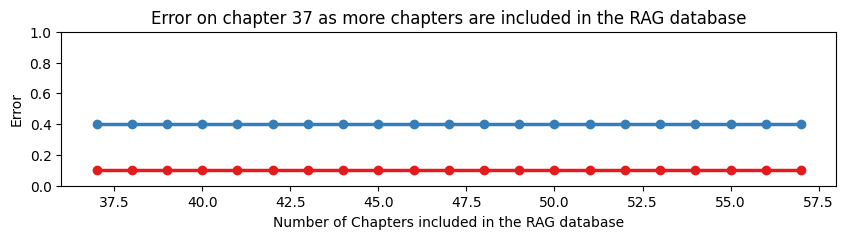

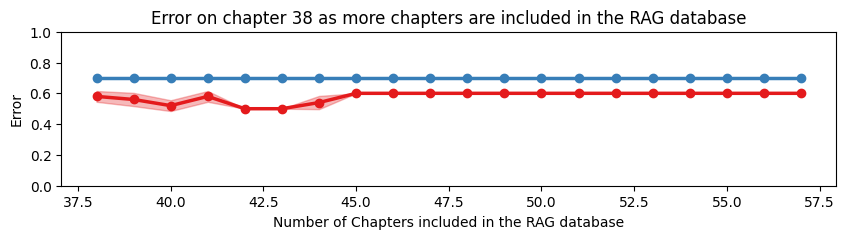

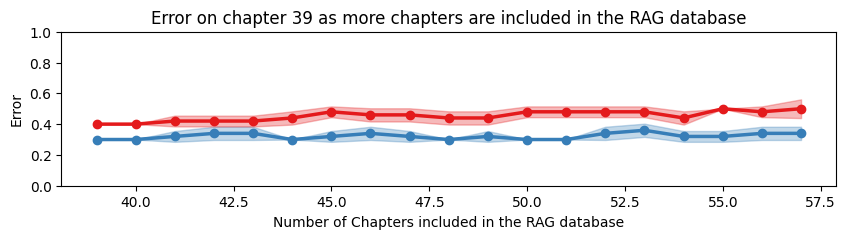

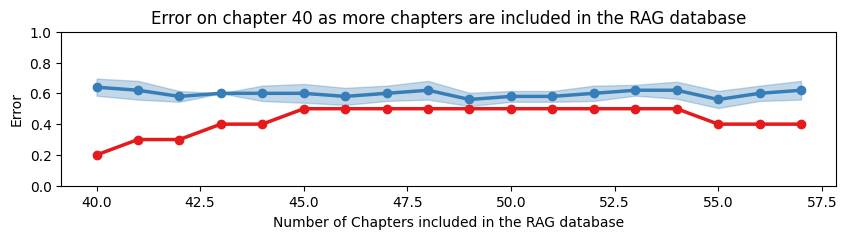

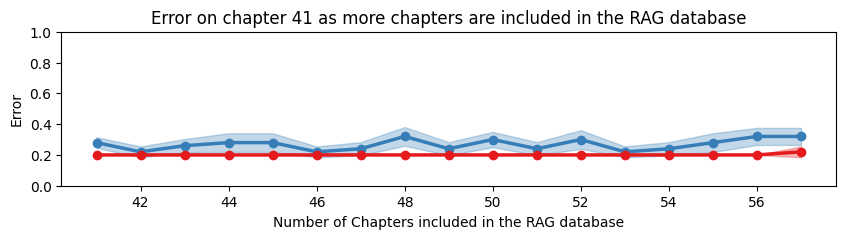

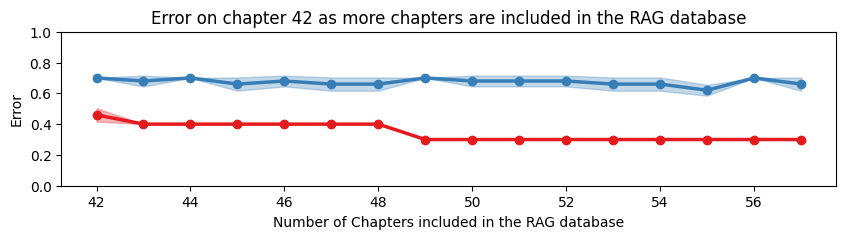

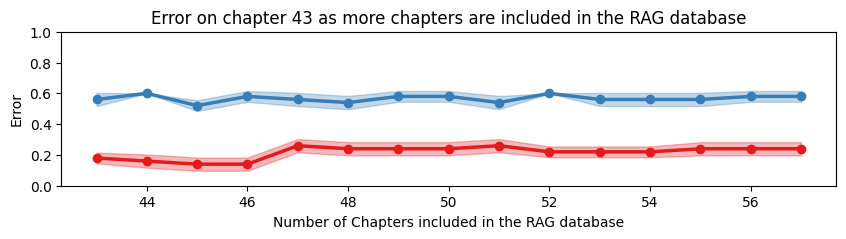

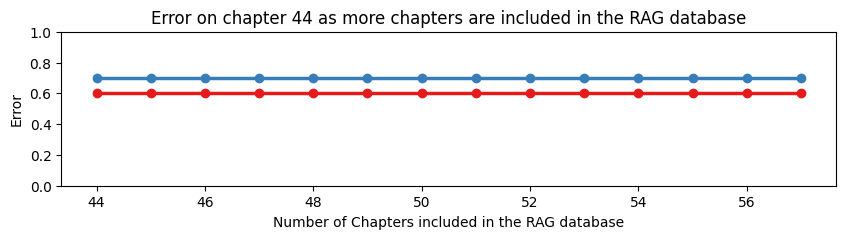

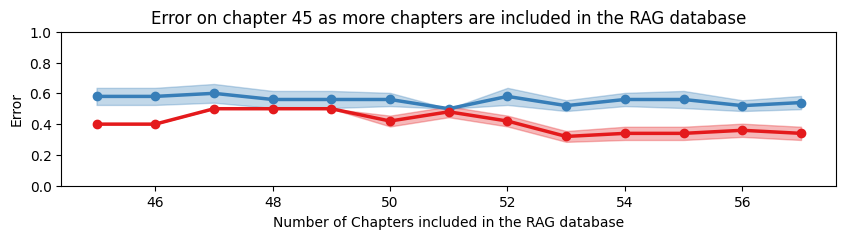

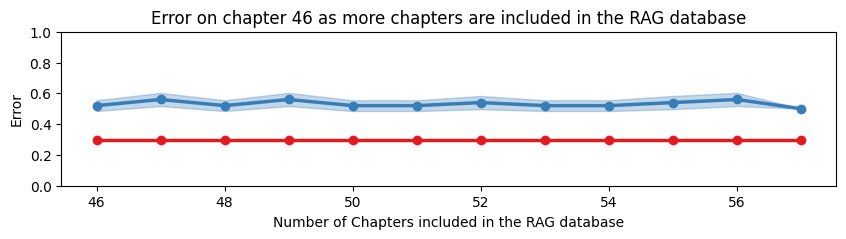

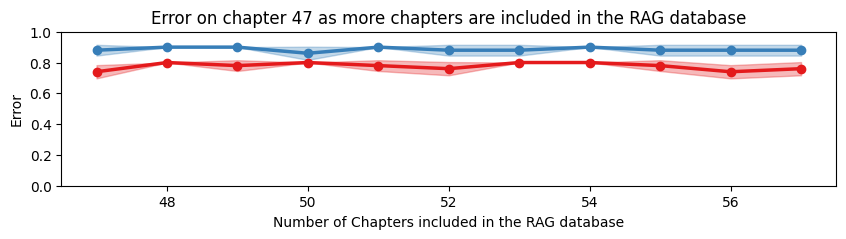

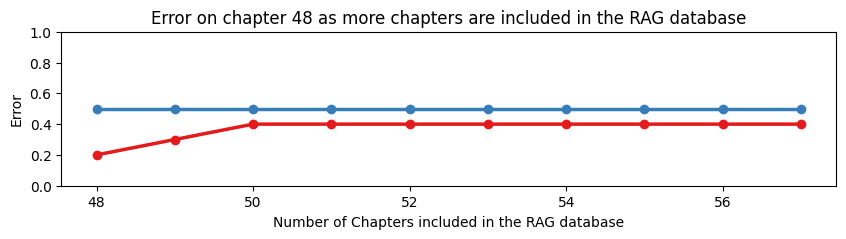

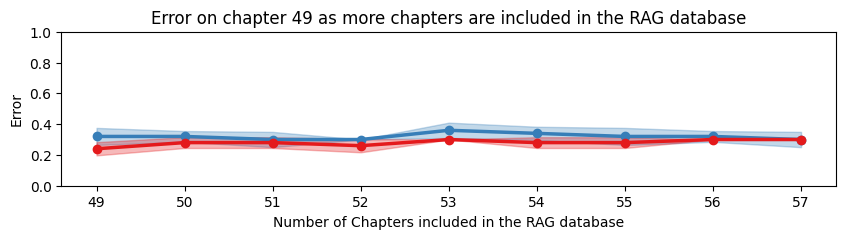

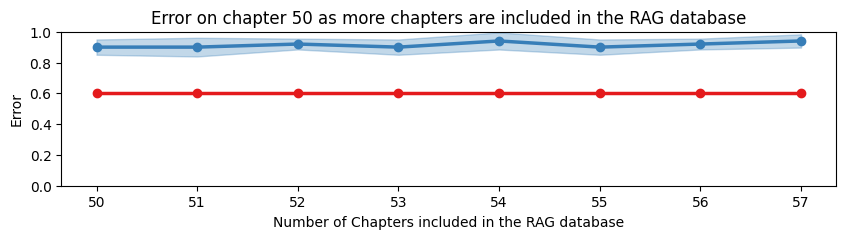

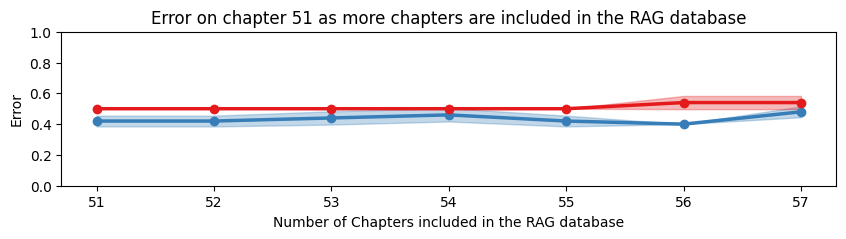

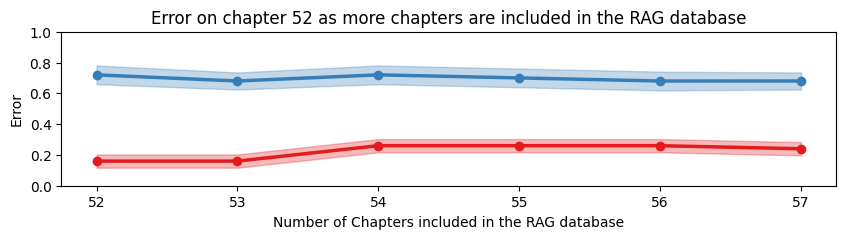

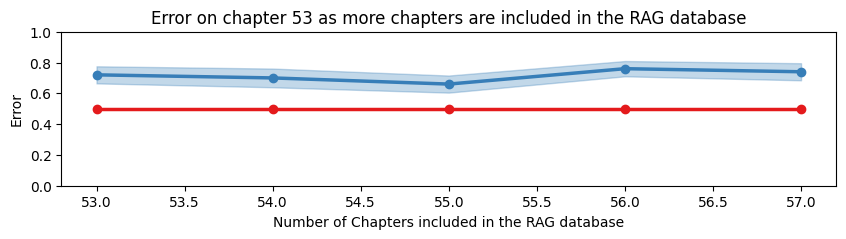

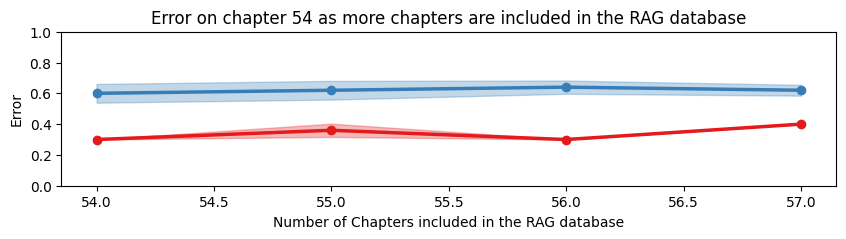

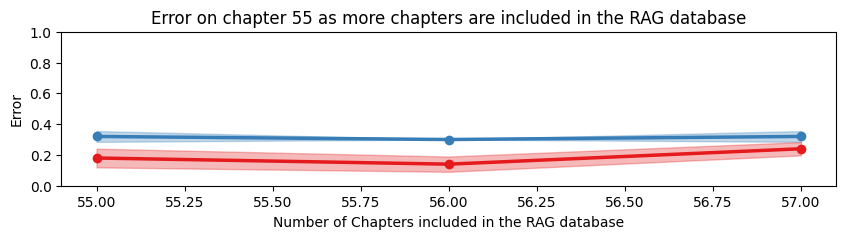

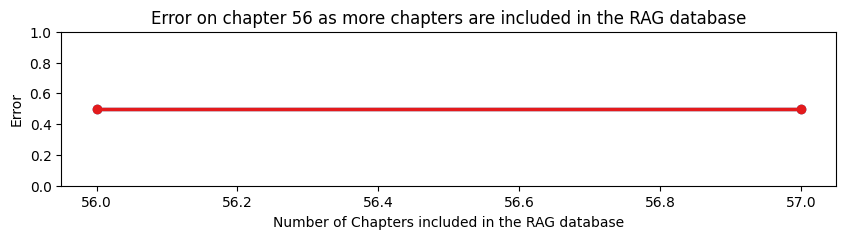

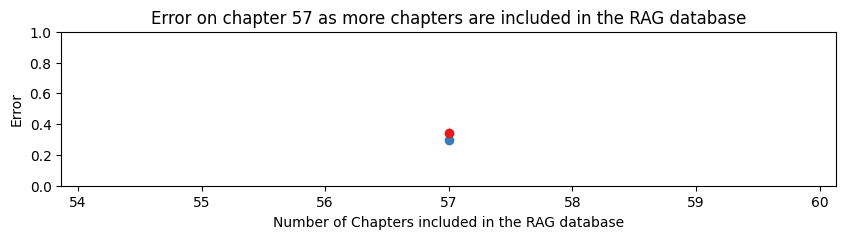

In [25]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fontsize = 16
lw = 2.5

vanilla_err_means, vanilla_err_stds = compute_chapterwise_errors("results/hp1_3_chapterwise/vanilla_seeds.json")
rag_err_means, rag_err_stds = compute_chapterwise_errors("results/hp1_3_chapterwise/rag_seeds.json")

num_chapters = vanilla_err_means.shape[0]
indices = np.linspace(0, 1, num_chapters)

for i in range(num_chapters):
    fig, ax = plt.subplots(1, 1, figsize=(10, 2))

    color = '#377eb8'
    err_means = vanilla_err_means[:, i][i:]
    err_std = vanilla_err_stds[:, i][i:]
    ci = 1.96 * err_std / np.sqrt(5)
    ax.plot(range(i+1, num_chapters+1), err_means, color=color, marker='o', lw=lw)
    ax.fill_between(range(i+1, num_chapters+1), err_means - ci, err_means + ci, color=color, alpha=0.3)

    # color = '#e41a1c'
    # chapter_errors = chapterwise_errors_rag[:, i][i:]
    # ax.plot(range(i+1, num_chapters+1), chapter_errors, color=color, marker='o', lw=lw)

    color = '#e41a1c'
    err_means = rag_err_means[:, i][i:]
    err_std = rag_err_stds[:, i][i:]
    ci = 1.96 * err_std / np.sqrt(5)
    ax.plot(range(i+1, num_chapters+1), err_means, color=color, marker='o', lw=lw)
    ax.fill_between(range(i+1, num_chapters+1), err_means - ci, err_means + ci, color=color, alpha=0.3)

    ax.set_ylim([0, 1])

    ax.set_xlabel("Number of Chapters included in the RAG database")
    ax.set_ylabel("Error")
    ax.set_title(f"Error on chapter {i+1} as more chapters are included in the RAG database")

    plt.show()